In [1]:
# DOWNLOAD KITTI OBJECTS DATASET & VISUALIZE

In [2]:
# import libs
import os
import zipfile
import requests
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

In [3]:
# DOWNLOAD DATASET 

In [3]:
def download_kitti_dataset(output_dir):
    
    os.makedirs(output_dir, exist_ok=True)

    files = {
        "data_object_image_2.zip":
            "https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip",
        "data_object_label_2.zip":
            "https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_label_2.zip"
    }

    for filename, url in files.items():
        out_path = Path(output_dir) / filename

        if out_path.exists():
            print(f"{filename} already downloaded.")
            continue

        print(f"Downloading {filename}...")
        r = requests.get(url, stream=True)
        with open(out_path, "wb") as f:
            for chunk in r.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)

        print(f"Extracting {filename}...")
        with zipfile.ZipFile(out_path, "r") as zip_ref:
            zip_ref.extractall(output_dir)

    print("KITTI dataset ready!")


In [4]:
output_dir = os.path.join(os.path.dirname(os.getcwd()), 'data')
# download_kitti_dataset(output_dir)

In [ ]:
# display the training data images along with its labels

In [8]:
def visualize_data(training_img_dir, training_label_dir, n_samples=4):
    
    images = list(Path(training_img_dir).glob('*.png'))[:n_samples]
    labels =  list(Path(training_label_dir).glob('*.txt'))[:n_samples]
    for idx, image in enumerate(images):
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        with open(labels[idx], "r") as f:
            for line in f.readlines():
                cls, x1, y1, x2, y2 = parse_label_data(line)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(img, cls, (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        plt.figure()
        plt.axis("off")
        plt.imshow(img)

# parse the label data
def parse_label_data(line):
    parts = line.strip().split()
    cls = parts[0]
    x1, y1, x2, y2 = map(int, map(float, parts[4:8]))
    return cls, x1, y1, x2, y2

In [43]:
# ViSUALIZE GROUND TRUTH LABELS

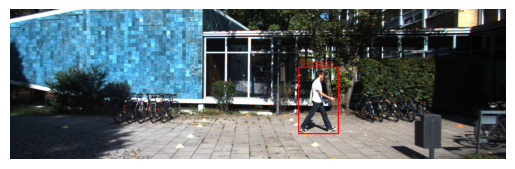

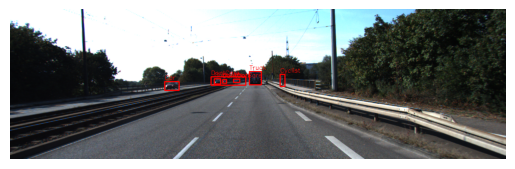

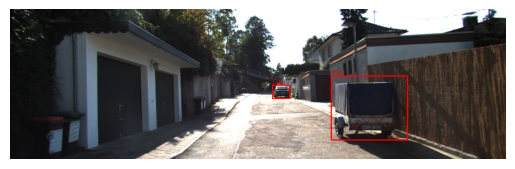

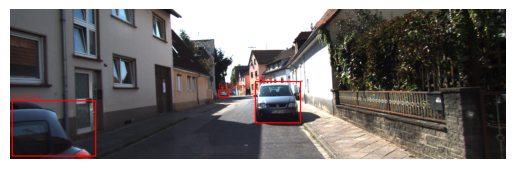

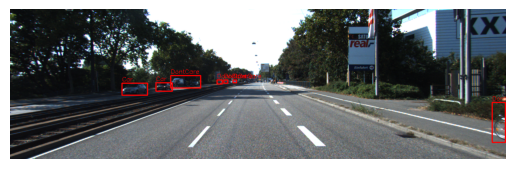

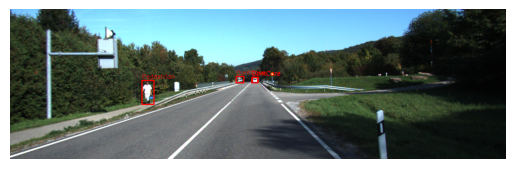

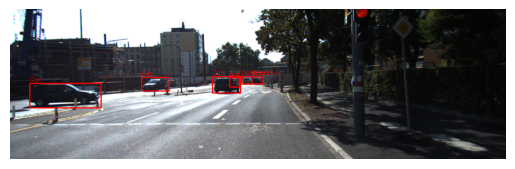

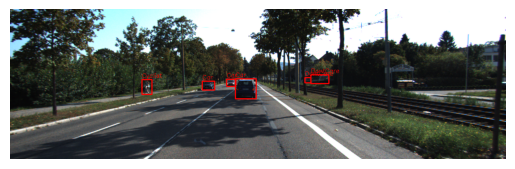

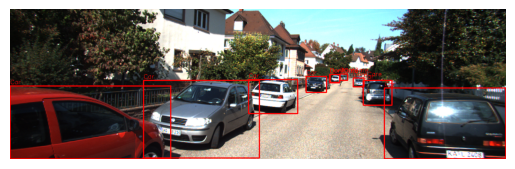

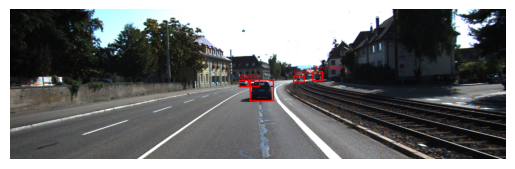

In [9]:
training_img_dir = os.path.join(output_dir, 'training', 'image_2') 
training_label_dir = os.path.join(output_dir, 'training', 'label_2') 
visualize_data(training_img_dir, training_label_dir, 10)